## EXERCICE 11 : Régression logistique et explicabilité

Vous voila maintenant prêts à utiliser vos connaissances méthodologiques et techniques pour l'étude de nouveaux cas. Nous allons maintenant tenter de distinguer des *8* et des *9* manuscrits à partir d'un modèle de régression logisique. Une fois le modèle appris et validé, nous expliquerons comment les décision sont prises en représentant les poids attribués aux différents pixels. 


(200, 784)
(200, 1)
8.53
(1800, 784)
(1800, 1)
8.51


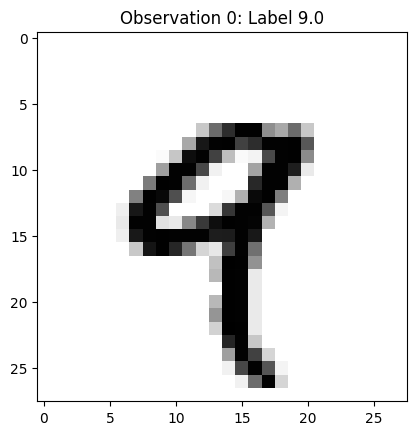

In [1]:

import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation


def ShowMNISTObservation(X_data,y_data,obsNb=0):
  plt.clf()
  plt.imshow(X_data[obsNb,:].reshape((28,28)),cmap='binary')
  plt.title('Observation '+str(obsNb)+': Label '+str((y_data[obsNb,0])))
  plt.show()


    
data=np.genfromtxt('./mnist_8_9.csv',delimiter=',')

n_tot=data.shape[0]
p=data.shape[1]

y_train=data[:200,0].reshape(-1,1)
X_train=data[:200,1:]

y_test=data[200:,0].reshape(-1,1)
X_test=data[200:,1:]


print(X_train.shape)
print(y_train.shape)
print(np.mean(y_train))
print(X_test.shape)
print(y_test.shape)
print(np.mean(y_test))

ShowMNISTObservation(X_train,y_train,obsNb=0)


### <span style="color:blue">QUESTIONS</span> 
    
#### <span style="color:blue">QUESTION 1</span> 
    
Bien comprendre la structuration des données dans l'exemple ci-dessus. Utilisez alors la classe de scikit-learn dédiée à la régression logistique pour apprendre à distinguer les 8 manuscrits les 9 manuscrits.
    
On notera que :
- les algorithmes d'apprentissage automatique sont souvent pré-calibrés pour prendre en entrée des données centrées-réduites dans le cas de données *tableaux*, ou des valeurs entre 0 et 1 dans le cas des données *images*.
- Les labels des deux classes en sortie (i.e. dans Y) seront 0 ou 1.

#### <span style="color:blue">REPONSE 1 </span> 

    




In [4]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.ravel()
y_test = y_test.ravel()

# Créez un modèle de régression logistique
logistic_model = LogisticRegression()

# Ajustez le modèle aux données d'entraînement
logistic_model.fit(X_train, y_train)

# Effectuez des prédictions sur les données de test
y_pred = logistic_model.predict(X_test)



#### <span style="color:blue">QUESTION 2</span> 

Une fois les paramètres du classifieur appris, validez son efficacité. 
    
#### <span style="color:blue">REPONSE 2</span> 


In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle de régression logistique :", accuracy)

Précision du modèle de régression logistique : 0.9538888888888889


    
#### <span style="color:blue">QUESTION 3</span> 

Visualisez les poids attribués à chaque pixel dans le classifieur pour expliquer quels pixels sont les plus influents dans la prise de décision.
    
#### <span style="color:blue">REPONSE 3</span> 


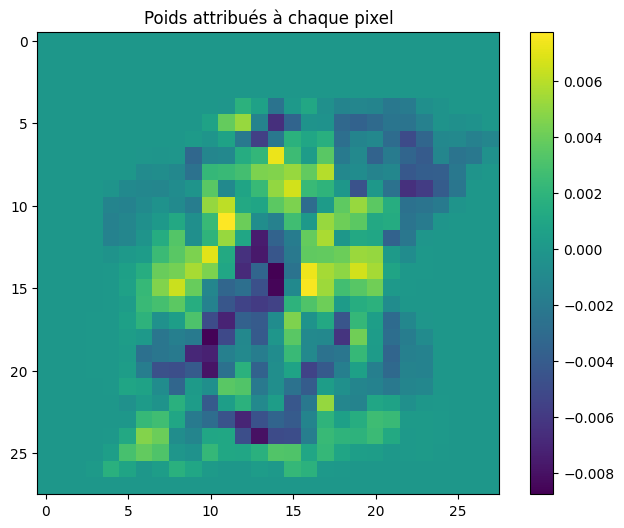

In [6]:
import matplotlib.pyplot as plt

# Obtenez les coefficients (poids) du modèle de régression logistique
coefficients = logistic_model.coef_[0]

# Reshape les coefficients pour les rendre compatibles avec la taille de l'image (28x28 pixels)
coefficients = coefficients.reshape((28, 28))

# Tracez les poids attribués à chaque pixel sous forme d'image
plt.figure(figsize=(8, 6))
plt.imshow(coefficients, cmap='viridis', interpolation='nearest')
plt.title("Poids attribués à chaque pixel")
plt.colorbar()
plt.show()


#### <span style="color:blue">QUESTION 4</span> 

Régularisez le problème d'appentissage, de manière à utiliser par la suite moins de 10 pixels pour la prise de décision. Représentez alors ces pixels. La localisation de ces points automatiquement détectés, vous semble-t-elle avoir du sens ? La précision des prédiction est-elle beaucoup pénalisée ? 
    
#### <span style="color:blue">REPONSE 4</span> 


Indices des pixels sélectionnés : [152 154 155 158 159 160 181 183 186 190 206 210 211 213 214 216 219 235
 236 237 238 239 240 241 246 262 266 267 271 274 275 290 291 298 299 300
 316 319 320 323 325 326 327 344 347 349 352 353 372 374 375 376 377 378
 380 381 382 383 384 401 402 404 405 406 408 409 410 411 412 427 428 431
 432 433 434 436 437 440 459 460 461 462 463 464 465 485 487 488 489 491
 494 497 514 515 517 519 522 523 525 541 542 549 553 567 568 569 570 576
 577 581 596 599 603 604 626 631 633 655 656 657 658 659 664 678 679 684
 685 686 687]


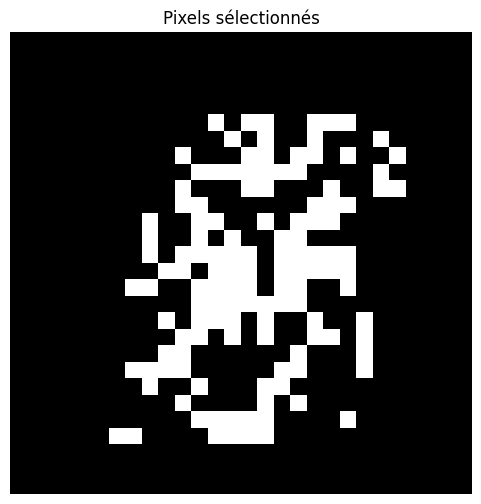

In [7]:
from sklearn.linear_model import LogisticRegression

# Créez un modèle de régression logistique avec une pénalisation L1 (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')

# Ajustez le modèle aux données d'entraînement
lasso_model.fit(X_train, y_train)

# Obtenez les coefficients non nuls (pixels les plus importants)
non_zero_coeffs = lasso_model.coef_[0]

# Récupérez les indices des pixels non nuls
non_zero_indices = np.nonzero(non_zero_coeffs)[0]

# Affichez les indices des pixels sélectionnés
print("Indices des pixels sélectionnés :", non_zero_indices)

# Visualisez les pixels sélectionnés sous forme d'image
selected_pixels_image = np.zeros((28, 28))
selected_pixels_image.ravel()[non_zero_indices] = 1

plt.figure(figsize=(6, 6))
plt.imshow(selected_pixels_image, cmap='gray')
plt.title("Pixels sélectionnés")
plt.axis('off')
plt.show()
